# Classification of Epileptical Seizures from EEG signals using Deep Learning



In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
X=df.values

In [ ]:
X=X[:,1:-1]

In [ ]:
from sklearn.model_selection import train_test_split


y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_train= np.asarray(X_train).astype(np.float32)
X_test= np.asarray(X_test).astype(np.float32)
Y_train= np.asarray(Y_train).astype(np.float32)
Y_test= np.asarray(Y_test).astype(np.float32)

In [ ]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)


X_train.shape
X_test.shape

(2300, 178, 1)

#  Intuition of the Epileptical Signal In the Dataset 

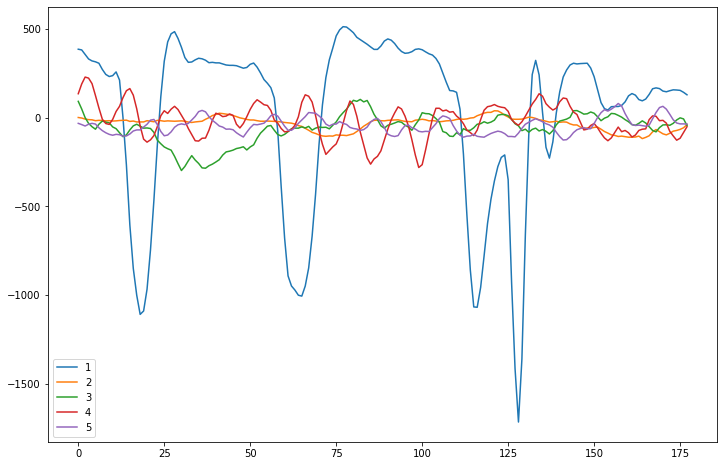

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Creating LSTM Neural Network For the Classification 

In [ ]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 45, 56)            12992     
_________________________________________________________________
dropout_8 (Dropout)          (None, 45, 56)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_9 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                1140      
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
hist = model.fit(((X_train[:,::4]-X_train.mean())/X_train.std()),Y_train[:,1:],validation_data=((X_test[:,::4]-X_test.mean())/X_test.std(),Y_test[:,1:]),epochs = 50, batch_size=15,shuffle=False)

Epoch 1/50
614/614 [==============================] - 69s 45ms/step - loss: 0.4246 - accuracy: 0.3733 - val_loss: 0.3880 - val_accuracy: 0.4539
Epoch 2/50
614/614 [==============================] - 27s 44ms/step - loss: 0.3799 - accuracy: 0.4454 - val_loss: 0.3781 - val_accuracy: 0.4657
Epoch 3/50
614/614 [==============================] - 27s 44ms/step - loss: 0.3739 - accuracy: 0.4629 - val_loss: 0.3681 - val_accuracy: 0.4809
Epoch 4/50
614/614 [==============================] - 27s 44ms/step - loss: 0.3536 - accuracy: 0.5099 - val_loss: 0.3306 - val_accuracy: 0.5352
Epoch 5/50
614/614 [==============================] - 27s 44ms/step - loss: 0.2967 - accuracy: 0.6092 - val_loss: 0.2598 - val_accuracy: 0.6683
Epoch 6/50
614/614 [==============================] - 27s 44ms/step - loss: 0.2630 - accuracy: 0.6501 - val_loss: 0.2476 - val_accuracy: 0.6722
Epoch 7/50
614/614 [==============================] - 27s 44ms/step - loss: 0.2472 - accuracy: 0.6733 - val_loss: 0.2416 - val_accuracy:

# Saving The Trained Model

In [ ]:
model.save('Epilepsy.h5')

# Visualisations

Graph Between Training Loss and Training Accuracy

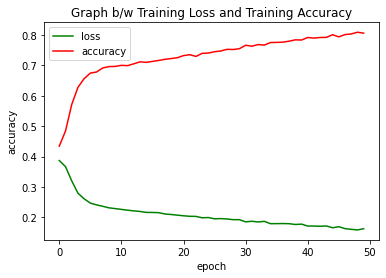

In [ ]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['accuracy'],'r')
plt.title('Graph b/w Training Loss and Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

Graph Between Validation Loss Function and Validation Accuracy

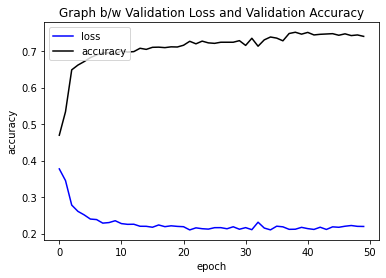

In [ ]:
plt.figure(0)
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_accuracy'],'black')
plt.title('Graph b/w Validation Loss and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()
plt.show()


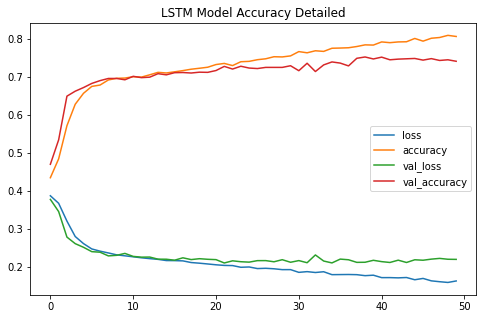

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.title('LSTM Model Accuracy Detailed')
plt.show()
